# Multiple Linear Regression Lab

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,5,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,8,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,9,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [3]:
df.shape

(17290, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Declare the dependent and independent variables

In [5]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

## Standardization / Scaling

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

## EDA

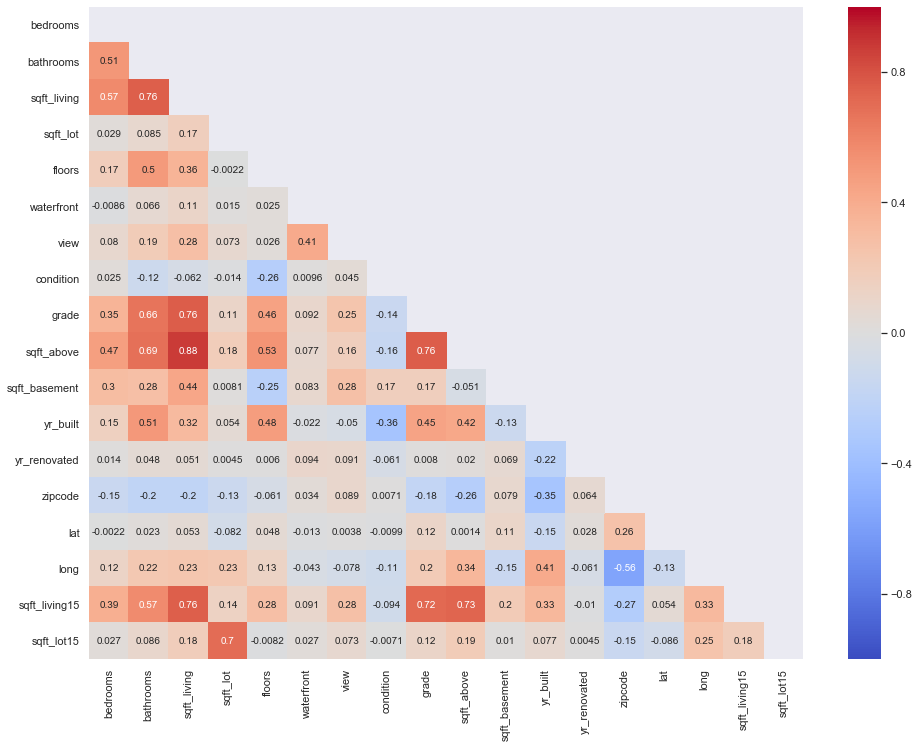

In [9]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

## Train test split

In [10]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


## Create the multiple linear regression

### Multiple Regression - 1 (all features, no pre-processing)

#### Training data

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [12]:
reg.coef_

array([-32945.44931976,  32021.12599608,  85387.3306987 ,   5150.08565499,
         2873.93479931,  52295.31681942,  40555.58301067,  18479.38801625,
       111624.76307035,  79890.68757578,  27772.34713157, -77390.14692002,
         7160.01906823, -30447.25933837,  83511.5921715 , -30827.51081959,
        13055.43755106,  -9638.66689396])

#### Get intercept

In [13]:
reg.intercept_

540154.2645224854

#### Feature summary and weights

In [14]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [15]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836695e-010, 8.58462842e-285, 9.98917315e-003,
       0.00000000e+000, 1.17572027e-019])

In [16]:
features_df['Weights'] = reg.coef_
features_df['P Values'] = p_values.round(3)
features_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
8,grade,111624.763070,0.00
2,sqft_living,85387.330699,0.00
14,lat,83511.592171,0.00
9,sqft_above,79890.687576,0.00
5,waterfront,52295.316819,0.00
6,view,40555.583011,0.00
1,bathrooms,32021.125996,0.00
10,sqft_basement,27772.347132,0.00
7,condition,18479.388016,0.00
16,sqft_living15,13055.437551,0.00


#### Get r^2 score and adjusted r^2 score

In [17]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [18]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.696612289269884

#### Get error

In [19]:
y_train_pred = reg.predict(X_train)

In [20]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450146986
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [21]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386547823
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [22]:
reg.score(X_test, y_test)

0.7027786929887427

In [23]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7012230129869391

In [24]:
y_test_pred = reg.predict(X_test)

In [25]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359181
Mean Squared Error: 39547299966.78129
Root Mean Squared Error: 198865.02952198833


In [26]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3313635402840598
Root Mean Squared Error Z: 0.5326946682117235


Text(0, 0.5, 'Predictions')

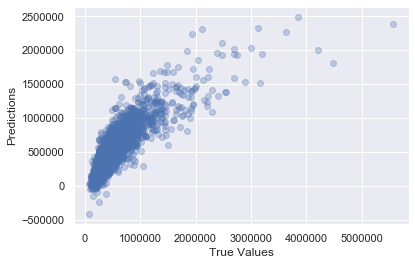

In [27]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [28]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


In [29]:
train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.703

#### Updated summary table of all models

In [30]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All features, no pre-processing' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,NaN


### Multiple Regression - 2 (removed sq15, lat, long, sqft_above)

In [31]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode']]

In [32]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.51828899,
        -0.20934943, -0.37669338],
       [ 1.73267171,  1.15264072,  0.88972019, ...,  0.21156841,
        -0.20934943,  0.68661253],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.8931697 ,
        -0.20934943, -1.34672683],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.60635314,
        -0.20934943, -0.93632806],
       [-0.39653183, -0.79426325, -0.19724586, ...,  0.00708802,
        -0.20934943, -0.74978317],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.6404332 ,
        -0.20934943,  1.43279211]])

#### Training data

In [34]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 13) Target:  (13832,)
Training set - Features:  (3458, 13) Target:  (3458,)


In [35]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [36]:
reg.coef_

array([-3.42944987e+04,  3.54006715e+04,  1.60730962e+05, -9.04177462e+03,
        1.26141240e+04,  5.12009584e+04,  3.48266038e+04,  1.35313272e+04,
        1.45429922e+05,  5.67012033e+01, -1.05321985e+05,  2.54286451e+03,
       -2.84856899e+02])

#### Get intercept

In [37]:
reg.intercept_

540427.2801839195

#### Feature summary and weights

In [38]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [39]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 5.33231772e-011, 4.01878922e-043,
       2.97836695e-010])

In [40]:
features2_df['Weights'] = reg.coef_
features2_df['P Values'] = p_values.round(3)
features2_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
2,sqft_living,160730.961930,0.0
8,grade,145429.921782,0.0
5,waterfront,51200.958430,0.0
1,bathrooms,35400.671506,0.0
6,view,34826.603816,0.0
7,condition,13531.327235,0.0
4,floors,12614.124027,0.0
11,yr_renovated,2542.864514,0.0
9,sqft_basement,56.701203,0.0
12,zipcode,-284.856899,0.0


#### Get r^2 score and adjusted r^2 score

In [41]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6514107033030707

In [42]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6510827498469223

#### Get error

In [43]:
y_train_pred = reg.predict(X_train)

In [44]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 141783.8885891773
Mean Squared Error: 49122017299.19097
Root Mean Squared Error: 221634.8738334989


In [45]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.37979287595876066
Root Mean Squared Error: 0.5936876677848918


#### Test Data

In [46]:
reg.score(X_test, y_test)

0.6549381086291963

In [47]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.6536356102006771

In [48]:
y_test_pred = reg.predict(X_test)

In [49]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 137747.77492060536
Mean Squared Error: 45912812450.653885
Root Mean Squared Error: 214272.75246902925


In [50]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.368981441506395
Root Mean Squared Error Z: 0.5739669415867898


Text(0, 0.5, 'Predictions')

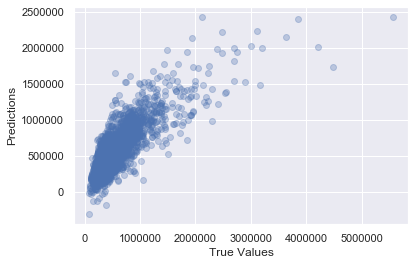

In [51]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [52]:
train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.655

#### Updated summary table of all models

In [53]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Minus 5 features' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,NaN
1,Multiple Regression-2,Minus 5 features,221634.874,0.651,0.651,0.655,0.654,NaN
